# Dog Breed Classification using Softmax

##  Adam Optimizer 

### Imports

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

### Directory

In [2]:
DATADIR = "C:/Users/Omkar/ML and DS/Dog/dataset"
CATEGORIES = ["German1","Golden1","Pug1"]
img_size = 64

### Loading Dataset

In [3]:
data = []

def load_data():
    for category in CATEGORIES:
        
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        
        for img in os.listdir(path):
            
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array,(img_size,img_size))
            data.append([new_array, class_num])

In [4]:
load_data()
print("No. of images: " + str(len(data)))
random.shuffle(data)

No. of images: 1004


### Sorting Data and Labels

In [5]:
X = []
y_unsorted = []

for features, label in data:
    
    X.append(features)
    y_unsorted.append(label)

In [6]:
def one_hot(labels,C):
    mapping = {}
    for i in range(C):
        mapping[i]=i
    one_hot_encode = []
    for l in labels:
        arr = list(np.zeros(C, dtype = int))
        arr[mapping[l]] = 1
        one_hot_encode.append(arr)
    return one_hot_encode

In [7]:
y = one_hot(y_unsorted,len(CATEGORIES))

In [8]:
X = np.array(X)
y = np.array(y)

print("Shape of X = "+ str(X.shape))
print("Shape of y = " + str(y.shape))

Shape of X = (1004, 64, 64, 3)
Shape of y = (1004, 3)


In [9]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [10]:
y_train = y_train.T 
y_test = y_test.T

In [11]:
m_train = x_train.shape[0]
m_test = x_test.shape[0]
num_px = x_train.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(x_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(x_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 803
Number of testing examples: m_test = 201
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (803, 64, 64, 3)
train_set_y shape: (3, 803)
test_set_x shape: (201, 64, 64, 3)
test_set_y shape: (3, 201)


In [12]:
train_set_x_flatten = x_train.reshape(x_train.shape[0], -1).T
test_set_x_flatten = x_test.reshape(x_test.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(y_test.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 803)
train_set_y shape: (3, 803)
test_set_x_flatten shape: (12288, 201)
test_set_y shape: (3, 201)
sanity check after reshaping: [ 68  81 105  91  98]


In [13]:
x_train = train_set_x_flatten/255.
x_test = test_set_x_flatten/255.

In [14]:
def init_params(layer_dims):
    
    parameters = {}
    L = len(layer_dims)
    
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * (np.sqrt(2. / layer_dims[l-1]))
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [15]:
def initialize_adam(parameters) :

    L = len(parameters) // 2 
    v = {}
    s = {}
    
    for l in range(L):

        v["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        v["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
        s["dW" + str(l+1)] = np.zeros(parameters["W" + str(l+1)].shape)
        s["db" + str(l+1)] = np.zeros(parameters["b" + str(l+1)].shape)
    
    return v, s

In [16]:
def relu(Z):
    
    A = np.maximum(0, Z)
    cache = Z
    
    return A, cache

In [17]:
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
  
    return dZ

In [18]:
def sigmoid(Z):
    
    A = 1 / (1+np.exp(-Z))
    cache = Z 
    
    return A, cache

In [19]:
def sigmoid_backward(dA, cache):
    
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1 - s)
    
    return dZ

In [20]:
def softmax(Z):
    
    e_x = np.exp(Z - np.max(Z))
    A = e_x / e_x.sum(axis=0, keepdims=True)
    cache = Z
    
    return A, cache

In [21]:
def sigmoid_derivative(Z):
    
    s = 1 / (1 + np.exp(-Z))
    
    return s * (1 - s)

In [22]:
def linear_forward(A, W, b):
    
    Z = W.dot(A) + b
    cache = (A, W, b)
    
    return Z, cache

In [23]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "relu":
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    if activation == "sigmoid":
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    if activation == "softmax":
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)

    cache = (linear_cache, activation_cache)
    return A, cache

In [24]:
def forwardpass(X, parameters):
    
    caches = []
    A = X
    L = len(parameters) // 2
  
    for l in range(1, L):
        
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters["b" + str(l)], activation="sigmoid")
        caches.append(cache)
  
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation="softmax")
    caches.append(cache)

    return AL, caches

In [25]:
def compute_cost(Y, AL):
    
    cost = -np.mean(Y * np.log(AL + 1e-8))
    
    return cost

In [26]:
def linear_backward(dZ, cache):
    
    A_prev, W, b = cache
    n = A_prev.shape[1]

    dW = 1./n * np.dot(dZ, A_prev.T)
    db = 1./n * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db

In [27]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
  
    if activation == "relu":
        
        dZ = relu_backward(dA, activation_cache)
        
    if activation == "sigmoid":
        
        dZ = sigmoid_backward(dA, activation_cache)
        
    elif activation == "softmax":
        
        dZ = dA
  
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [28]:
def backwardpass(AL, Y, caches):
    
    grads = {}
    L = len(caches)
    n = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = AL - Y
    curr_cache = caches[L-1]
    
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, curr_cache, activation="softmax")

    for l in reversed(range(L-1)):
        
        curr_cache = caches[l]
        dA_prev, dW, db = linear_activation_backward(grads["dA" + str(l+1)], curr_cache, activation = "sigmoid")
        
        grads["dA" + str(l)] = dA_prev
        grads["dW" + str(l + 1)] = dW
        grads["db" + str(l + 1)] = db 

    return grads

In [29]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2
    
    for l in range(1,L+1):
        
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
        
    return parameters

In [30]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):

    L = len(parameters) // 2                 
    v_corrected = {}                         
    s_corrected = {}                         
    
    for l in range(L):

        v["dW" + str(l+1)] = beta1*v["dW" + str(l+1)] + (1-beta1)*grads['dW' + str(l+1)]
        v["db" + str(l+1)] = beta1*v["db" + str(l+1)] + (1-beta1)*grads['db' + str(l+1)]

        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1-np.power(beta1,t))
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1-np.power(beta1,t))

        s["dW" + str(l+1)] = beta2*s["dW" + str(l+1)]+(1-beta2)*np.power(grads['dW' + str(l+1)],2)
        s["db" + str(l+1)] = beta2*s["db" + str(l+1)]+(1-beta2)*np.power(grads['db' + str(l+1)],2)

        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1-np.power(beta2,t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1-np.power(beta2,t))

        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-learning_rate*v_corrected["dW" + str(l+1)]/np.sqrt(s_corrected["dW" + str(l+1)] +epsilon)
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-learning_rate*v_corrected["db" + str(l+1)]/np.sqrt(s_corrected["db" + str(l+1)]+epsilon)

    return parameters, v, s

In [31]:
def model(X, Y, layer_dims, learning_rate = 0.001, epochs = 5, print_cost = True):
    
    costs = []
    t = 0
    
    parameters = init_params(layer_dims)
    v, s = initialize_adam(parameters)
    
    
    for i in range(epochs):
        AL, caches = forwardpass(X, parameters)
        cost = compute_cost(Y, AL) 
        grads = backwardpass(AL, Y, caches)
        #parameters = update_parameters(parameters, grads, learning_rate)
        t = t + 1
        parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8)

        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
        if i % 10 == 0:
            costs.append(cost)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per 10s)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.368256
Cost after iteration 100: 0.308622
Cost after iteration 200: 0.359844
Cost after iteration 300: 0.221493
Cost after iteration 400: 0.250636
Cost after iteration 500: 0.219193
Cost after iteration 600: 0.357589
Cost after iteration 700: 0.342811
Cost after iteration 800: 0.341662
Cost after iteration 900: 0.216195


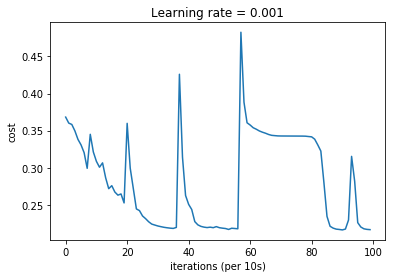

In [42]:
layer_dims = [12288, 24, 4, 3]
parameters = model(x_train, y_train, layer_dims, learning_rate = 0.001, epochs = 1000)

In [43]:
def predict(X, y, parameters):
    
    predictions, caches = forwardpass(X, parameters)
    
    return predictions

In [44]:
def make_pred(X ,y):
    
    predictions = predict(X, y, parameters)

    y_hat = np.argmax(predictions, axis = 0)
    y_label = np.argmax(y, axis = 0)

    return y_hat, y_label

In [45]:
y_hat, y_label = make_pred(x_train, y_train)

score = accuracy_score(y_label, y_hat)

print("Training accuracy: " + str(score * 100) + " %")

Training accuracy: 64.63262764632628 %


In [46]:
y_hat, y_label = make_pred(x_test, y_test)

score = accuracy_score(y_label, y_hat)

print("Testing accuracy: " + str(score * 100) + " %")


Testing accuracy: 53.233830845771145 %
